<a href="https://colab.research.google.com/github/souzajvp/data_science_bootcamp/blob/main/Jo%C3%A3o_V%C3%ADtor_Souza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

#### Importando módulos e lendo os dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline


Decidi fazer o upload do arquivo 'casos.csv.gz' no meu [github](https://github.com/souzajvp/data_science_bootcamp) para facilitar a importação e automatizar o processo para futuros leitores.

In [ ]:
url = 'https://github.com/souzajvp/data_science_bootcamp/blob/main/caso.csv.gz?raw=true'
dados = pd.read_csv(url, compression='gzip')

# Análise dos dados

In [ ]:
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-03,AP,NaN,state,52832,751,228,True,845731.0,861773.0,16.0,6130.61676,0.0142
1,2020-11-02,AP,NaN,state,52653,749,227,False,845731.0,861773.0,16.0,6109.84563,0.0142
2,2020-11-01,AP,NaN,state,52500,748,226,False,845731.0,861773.0,16.0,6092.09154,0.0142
3,2020-10-31,AP,NaN,state,52175,748,225,False,845731.0,861773.0,16.0,6054.37859,0.0143
4,2020-10-30,AP,NaN,state,52030,747,224,False,845731.0,861773.0,16.0,6037.55281,0.0144


## Valores nulos

In [ ]:
dados.isnull().sum(axis=0)

date                                  0
state                                 0
city                               6383
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3672
estimated_population               3672
city_ibge_code                     3672
confirmed_per_100k_inhabitants    16999
death_rate                            0
dtype: int64

Notamo que as colunas que tem valores `NaN` são:
 - city;
 - estimated_population_2019;
 - estimated_population;
 - city_ibge_code;
 - confirmed_per_100k_inhabitants.

Certo, mas e quanto aos tipos de dados em cada coluna?

In [ ]:
dados.dtypes

date                               object
state                              object
city                               object
place_type                         object
confirmed                           int64
deaths                              int64
order_for_place                     int64
is_last                              bool
estimated_population_2019         float64
estimated_population              float64
city_ibge_code                    float64
confirmed_per_100k_inhabitants    float64
death_rate                        float64
dtype: object

Notamos como os números faltantes de `estimated_population_2019`, `estimated_population` e `city_ibge_code` são os mesmos

In [ ]:
dados.query('city_ibge_code == "NaN"').city.value_counts()

Importados/Indefinidos    3672
Name: city, dtype: int64

Pelo visto, estes 3672 dados faltantes na verdade são de casos classificados como origem "Importados/Indefinidos". <br> Talvez eu possa preencher esses dados como 0 para discernir de outros dados faltantes.

#### Mas e quanto aos dados faltantes na coluna `city`?

In [ ]:
city_null_pop = dados[dados['city'].isnull() == True]['estimated_population'].unique()

In [ ]:
print(len(city_null_pop))
print(city_null_pop)

27
[  861773.   894470.  4207714.  3055149.  3351543.  9187103.  4064052.
 14930634.  2809394.  7114598.  7113540.  3526220.  8690745.  4039277.
  9616621. 21292666.  3281480.  1796460. 17366189.  3534165. 11516840.
   631181.  2318822.  7252502. 11422973.  1590248. 46289333.]


Aparentemente, as linhas que contém dados nulos para cidade são linhas contendo atualizações de cada estado


Vamos separar os dados de acordo com estado e verificar a diferença entre eles.

In [ ]:
dados_SP = dados.query("state == 'SP' & place_type == 'state'")
dados_PR = dados.query("state == 'PR' & place_type == 'state'")

In [ ]:
print(dados_PR.shape, dados_SP.shape)

(239, 13) (253, 13)


In [ ]:
print(len(dados_PR.city.unique()))
print(len(dados_SP.city.unique()))

1
1


Notamos como há diferenças entre o `shape` dos dois datasets, possivelmente pelo número de cidades coletada em cada estado

## Avaliando o Paraná

In [ ]:
dados_PR
dados_PR_rv = dados_PR.iloc[::-1]
dados_PR_rv.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
592965,2020-03-12,PR,NaN,state,6,0,1,False,11433957.0,11516840.0,41.0,0.05210,0.0
592964,2020-03-13,PR,NaN,state,6,0,2,False,11433957.0,11516840.0,41.0,0.05210,0.0
592963,2020-03-16,PR,NaN,state,6,0,3,False,11433957.0,11516840.0,41.0,0.05210,0.0
592962,2020-03-17,PR,NaN,state,12,0,4,False,11433957.0,11516840.0,41.0,0.10420,0.0
592961,2020-03-18,PR,NaN,state,14,0,5,False,11433957.0,11516840.0,41.0,0.12156,0.0


In [ ]:
dados_PR_rv.isnull().sum()

date                                0
state                               0
city                              239
place_type                          0
confirmed                           0
deaths                              0
order_for_place                     0
is_last                             0
estimated_population_2019           0
estimated_population                0
city_ibge_code                      0
confirmed_per_100k_inhabitants      0
death_rate                          0
dtype: int64

In [ ]:
dados_PR_rv = dados_PR_rv.set_index('date')

#### Criando novas colunas:
1. Novos casos - utilizando a função `diff()`
2. Média móvel dos últimos 7 dias - utilizando a função `.rolling(window=7).mean()`

Pessoal, estou tentando comparar o número de novos casos de Covid e a média móvel de casos em um mesmo gráfico. Porém não estou gostando do look dele, alguém tem alguma dica? 

In [ ]:
dados_PR_rv['new_cases'] = dados_PR_rv['confirmed'].diff()

In [ ]:
dados_PR_rv['media_movel'] = dados_PR_rv.iloc[:,-1].rolling(window=7).mean()

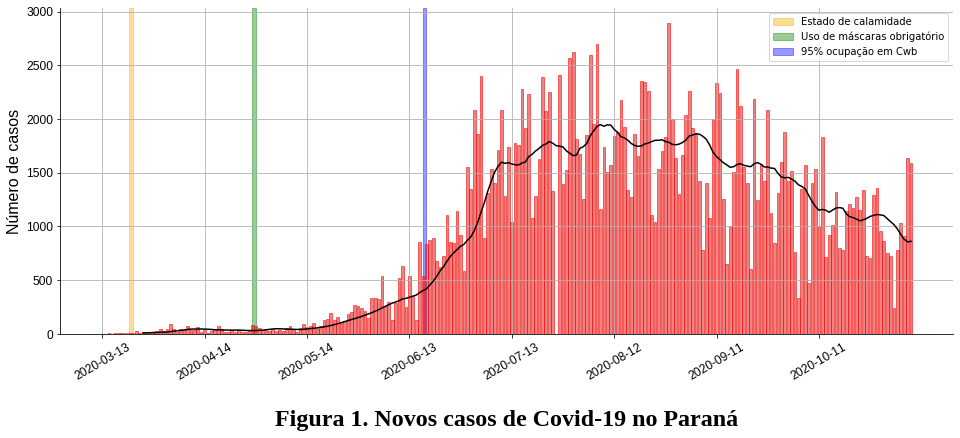

In [146]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x=dados_PR_rv.index, y=dados_PR_rv['new_cases'], color='red', alpha=0.55, edgecolor='red')
sns.lineplot(x=dados_PR_rv.index, y= dados_PR_rv.media_movel, color = 'black', markers=True, alpha=1)
sns.despine()

plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figura 1. Novos casos de Covid-19 no Paraná', fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Número de casos', fontsize=16, fontname="Liberation Sans")
plt.xlabel('')

# Criando xticks separados por 30:
pos = [i for i in range(1, len(dados_PR_rv.index), 30)]
l = []
for i in pos:
  l.append(dados_PR_rv.index[i])

plt.grid()
ax.set(xticks=pos, xticklabels=l);


plt.axvspan(9,10, zorder=0, alpha=0.4, color='orange', label='Estado de calamidade')
plt.axvspan(45, 46, zorder=0, alpha=0.4, color='green', label='Uso de máscaras obrigatório')
plt.axvspan(95, 96, zorder=0, alpha=0.4, color='blue', label='95% ocupação em Cwb')

plt.legend()

Barras vermelhas indicam o número diário de novos casos no PR. A linha preta representa a média móvel (7 dias) de novos casos. Destacados em amarelo, verde e azul temos o decreto de calamidade pública (23/03), decreto que torna obrigatório o uso de máscaras (8/04) e o ponto (17/06) em que o índice de ocupação das UTIs de Curitiba chegou a 95%.

In [ ]:
# Como localizar as datas para ajustar as marcações.
dados_PR_rv.index.tolist().index('2020-06-17')

state                                      PR
city                                      NaN
place_type                              state
confirmed                               11225
deaths                                    394
order_for_place                            96
is_last                                 False
estimated_population_2019          1.1434e+07
estimated_population              1.15168e+07
city_ibge_code                             41
confirmed_per_100k_inhabitants         97.466
death_rate                             0.0351
new_cases                                 535
media_movel                           402.571
Name: 2020-06-17, dtype: object

## Avaliando Maringá-Pr

In [ ]:
dados_maringa = dados_PR = dados.query("city == 'Maringá'")

In [ ]:
dados_maringa.isnull().sum()

date                              0
state                             0
city                              0
place_type                        0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population_2019         0
estimated_population              0
city_ibge_code                    0
confirmed_per_100k_inhabitants    0
death_rate                        0
dtype: int64

In [ ]:
dados_maringa_rv = dados_maringa.iloc[::-1]

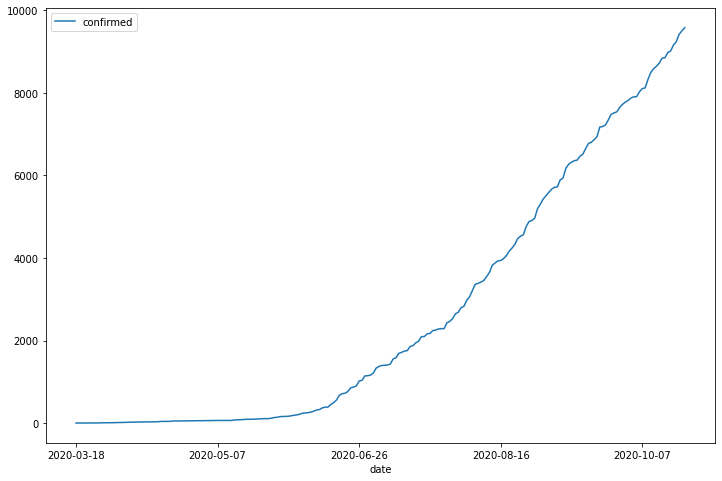

In [ ]:
ax = dados_maringa_rv.plot(x='date', y='confirmed', figsize=(12,8));
# dados_maringa_rv.iloc[21:40].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));
# dados_maringa_rv.iloc[41:60].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));
# dados_maringa_rv.iloc[61:80].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));
# dados_maringa_rv.iloc[81:100].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));

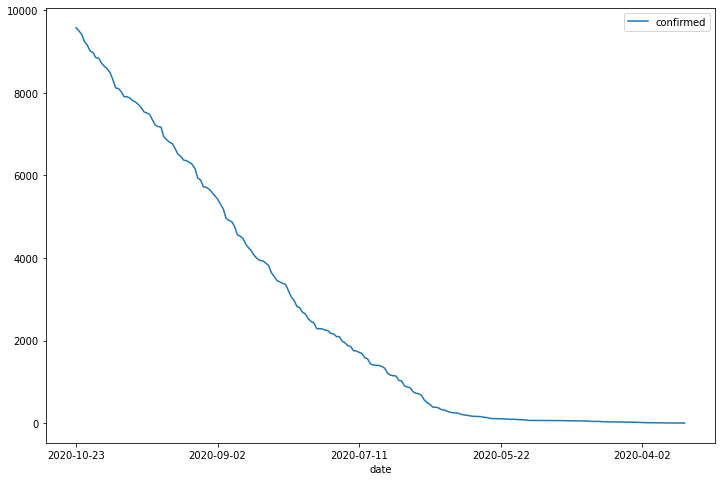

In [ ]:
ax = dados_PR.plot(x='date', y='confirmed', figsize=(12,8));
# dados_PR.iloc[21:40].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));
# dados_PR.iloc[41:60].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));
# dados_PR.iloc[61:80].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));
# dados_PR.iloc[81:100].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));

In [ ]:
dados_maringa_rv['new_cases'] = dados_maringa_rv['confirmed'].diff()

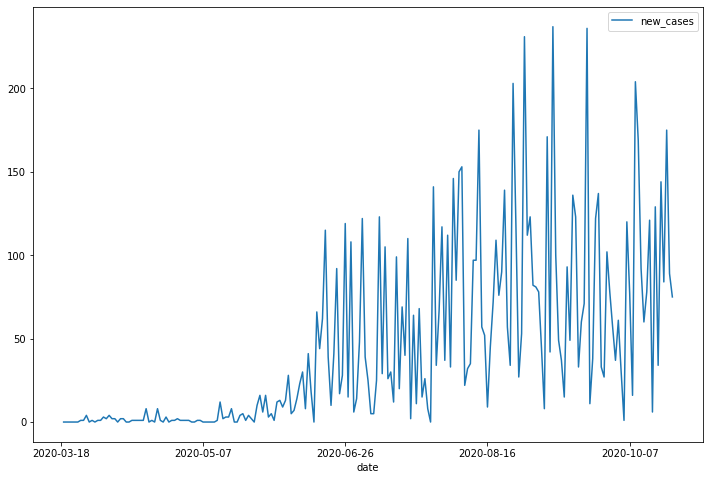

In [ ]:
dados_maringa_rv.plot(x='date', y='new_cases', figsize=(12,8))

In [ ]:
dados_maringa_rv.columns

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths',
       'order_for_place', 'is_last', 'estimated_population_2019',
       'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate', 'new_cases'],
      dtype='object')

Calculando a média móvel


In [ ]:
dados_maringa_rv['pandas_SMA_7'] = dados_maringa_rv.iloc[:,-1].rolling(window=7).mean()


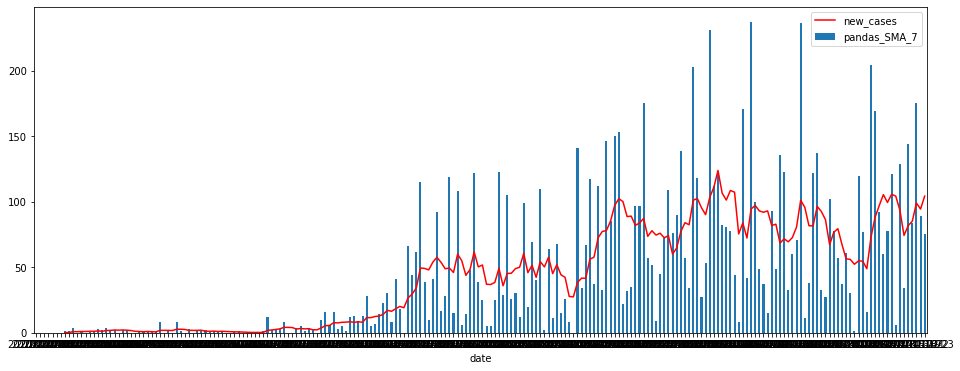

In [ ]:
ax = dados_maringa_rv.plot(x='date', y='new_cases',  figsize=(12,8), kind = 'bar');
dados_maringa_rv.plot(ax = ax, x='date', y='pandas_SMA_7', figsize=(16,6), color='red', secondary_y=False)
